# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning
## Sesion 1, Actividad I
**Universidad Privada Boliviana**<br/>
**Diplomado en Machine Learning y Ciencia de Datos**<br/>



<hr>


In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


## Seleccion de modelos

## 1. PolynomialFeatures en Scikit-Learn

La función `PolynomialFeatures` de Scikit-Learn se utiliza para generar un conjunto de características polinómicas a partir de un conjunto de características existentes. Para un conjunto de características de entrada $ X = [x_1] $, `PolynomialFeatures` genera un nuevo conjunto de características que incluye todas las combinaciones polinómicas de las características originales hasta un cierto grado especificado.

### Representación Matemática

Dado un conjunto de características de entrada $ X = [x_1] $, la transformación polinómica de grado $ d$ generará un nuevo conjunto de características $ \Phi(X) $ de la siguiente manera:

$$
\Phi(X) = [1, x_1, x_1^2, \ldots, x_n^d]
$$

Donde \( d $ es el grado de las características polinómicas generadas.

### Uso en Scikit-Learn

```python
from sklearn.preprocessing import PolynomialFeatures

# Crear un objeto PolynomialFeatures con un grado específico
poly = PolynomialFeatures(degree=d)

# Transformar el conjunto de características original X
X_poly = poly.fit_transform(X)

```


In [12]:
## Leer los datos "data_set_1.csv"
df = pd.read_csv('dataset1.csv')
df.head(2)

,x1,y1
0,0.265960,1.624972
1,0.516805,2.734012


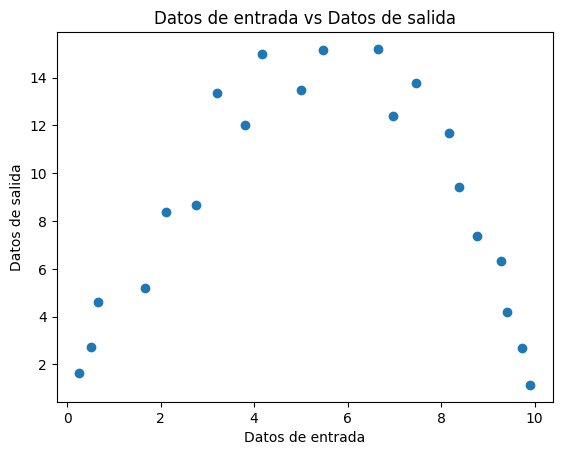

In [13]:
# graficar los datos 
plt.plot(df["x1"], df["y1"], 'o')
plt.xlabel("Datos de entrada")
plt.ylabel("Datos de salida")
plt.title("Datos de entrada vs Datos de salida")
plt.show()

In [14]:
# encontrar la transformacion de polinomios para un grado 3
x = df[["x1"]].values
y = df["y1"].values
poly = PolynomialFeatures(degree=3).fit_transform(x)

In [15]:
print(x[:5])

[[0.26595981]
 [0.51680454]
 [0.65854208]
 [1.67805194]
 [2.11246338]]


In [16]:
print(y[:5])

[1.62497183 2.73401223 4.62890802 5.18645478 8.39508824]


In [17]:
print(poly[:5])

[[1.         0.26595981 0.07073462 0.01881257]
 [1.         0.51680454 0.26708693 0.13803174]
 [1.         0.65854208 0.43367767 0.285595  ]
 [1.         1.67805194 2.81585832 4.72515652]
 [1.         2.11246338 4.46250154 9.42687108]]


## 2. Regresion lineal polinomial



La regresión lineal polinomial es una técnica de regresión que permite modelar relaciones no lineales entre la variable de entrada $x$ y la variable de salida $y$. En lugar de ajustar una línea recta, la regresión lineal polinomial ajusta un polinomio de grado $d$.

### Modelo Matemático

El modelo de regresión lineal polinomial de grado $d$ se define como:

$$
y = w_0 + w_1x + w_2x^2 + \ldots + w_dx^d + \varepsilon
$$

Donde:
- $y$ es la variable de salida.
- $x$ es la variable de entrada.
- $w_0, w_1, \ldots, w_d$ son los coeficientes del polinomio.
- $d$ es el grado del polinomio.
- $\varepsilon$ representa el error aleatorio.

### Uso en Scikit-Learn

```python
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Crear características polinómicas de grado d
poly = PolynomialFeatures(degree=d)
X_poly = poly.fit_transform(X)

# Crear modelo de regresión lineal
lreg = LinearRegression()

# Ajustar el modelo con las características polinómicas y las etiquetas
lreg.fit(X_poly, y)



### 2.1 Modelo de regresion lineal de primer grado

In [18]:
## Encontrar los coeficientes de regresion lineal de grado 1
xp = PolynomialFeatures(degree=10).fit_transform(x)
lreg  = LinearRegression(fit_intercept=False)
lreg.fit(xp, y)
lreg.coef_

array([-3.91916231e+00,  3.03086763e+01, -4.63795916e+01,  3.74516144e+01,
       -1.72298042e+01,  4.98534924e+00, -9.48674660e-01,  1.18926733e-01,
       -9.44713206e-03,  4.29841872e-04, -8.50711487e-06])

In [19]:
# Generar los datos que se encuentren igualmente espaciados
# desde el punto minimo y el punto maximo de la variable de entrada

xin = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# transformar x_in a polynomial features de grado 1

xin_p = PolynomialFeatures(degree=10).fit_transform(xin)

# En base a los coeficientes encontrados en el modelo de regresion lineal 
# encontrar la prediccion de la variable de salida

y_pred = lreg.predict(xin_p)


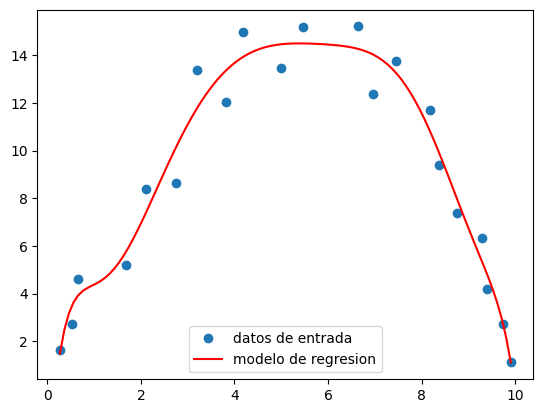

In [20]:
# Graficar los datos de entrada y la prediccion encontrada. 
plt.plot(df["x1"], df["y1"], 'o', label = "datos de entrada") # Datos de entrada
plt.plot(xin, y_pred, 'r', label = "modelo de regresion") # Prediccion 
plt.legend(loc = "best")
plt.show()

In [21]:
# Encontrar el mean_squared_error de la prediccion
y_pred = lreg.predict(xp)
mse_datos = mean_squared_error(y, y_pred)
print("Mean Squared Error: ", mse_datos)

Mean Squared Error:  0.8500851653980264


#### ⏸ Si tenemos un polinomio grado 2, y luego se realiza el proceso de regresion lineal, se considera este modelo como un modelo de regresion lineal?

Anotar aca la respuesta...

### 2.2 Modelo de regresion lineal de grado > 1. 

Repetir el procedimiento en el punto 2.1 para una regresion lineal de grado: $2, 3, 10, 18$

Para cada caso indicar en una grafica el error MSE vs el grado del polinomio

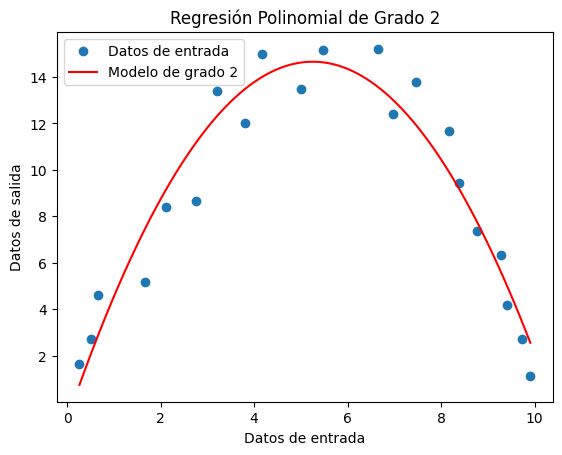

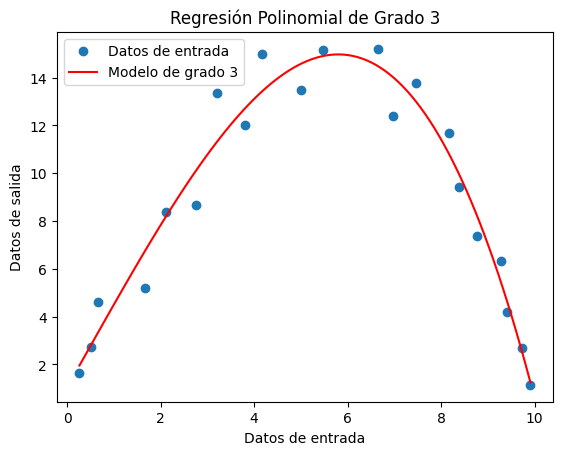

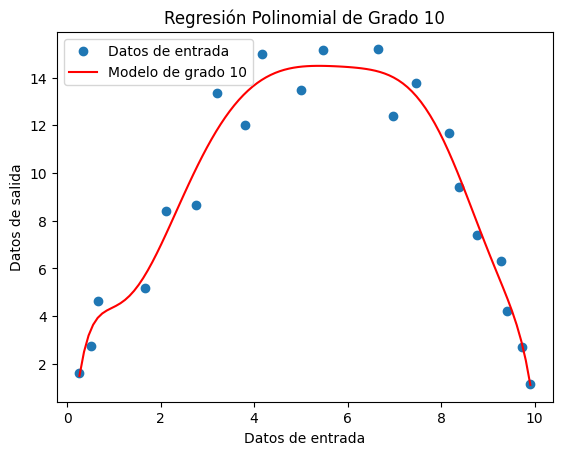

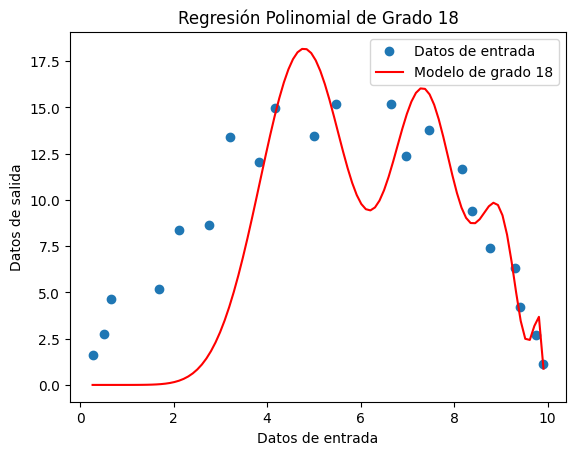

In [22]:
# tu codigo aca
grados = [2, 3, 10, 18]

mse_errores = []
for grado in grados:
    # Crear características polinómicas de grado actual
    xp = PolynomialFeatures(degree=grado).fit_transform(x)
    
    # Crear y ajustar el modelo de regresión lineal
    lreg = LinearRegression(fit_intercept=False)
    lreg.fit(xp, y)
    
    # Predecir los valores de salida
    y_pred = lreg.predict(xp)
    
    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(y, y_pred)
    mse_errores.append(mse)
    
    # Generar datos igualmente espaciados para graficar
    xin = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    xin_p = PolynomialFeatures(degree=grado).fit_transform(xin)
    y_pred_plot = lreg.predict(xin_p)
    
    # Graficar los datos y el modelo ajustado
    plt.figure()
    plt.plot(df["x1"], df["y1"], 'o', label="Datos de entrada")
    plt.plot(xin, y_pred_plot, 'r', label=f"Modelo de grado {grado}")
    plt.legend(loc="best")
    plt.title(f"Regresión Polinomial de Grado {grado}")
    plt.xlabel("Datos de entrada")
    plt.ylabel("Datos de salida")
    plt.show()

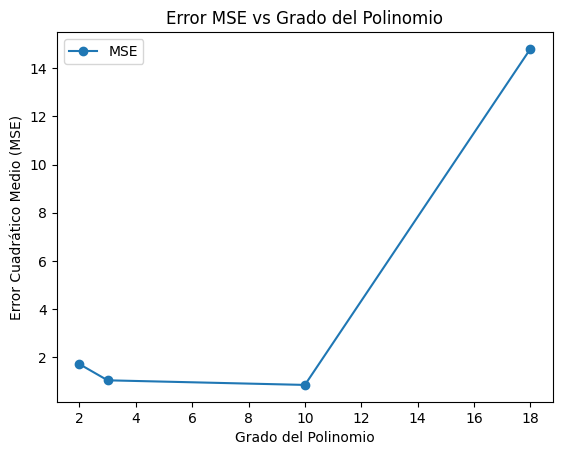

In [23]:
# Grafica de los resultados
plt.figure()
plt.plot(grados, mse_errores, 'o-', label="MSE")
plt.title("Error MSE vs Grado del Polinomio")
plt.xlabel("Grado del Polinomio")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.legend(loc="best")
plt.show()


#### Comentarios y observaciones:
En base a los resultados anteriores... `completar esta seccion`